In [1]:
%matplotlib inline
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\ckkim\\Desktop\\Misc')

In [2]:
def parse_data(zip):
    source_file_name = str(zip) + '.csv'

    df = pd.read_csv(source_file_name, encoding = "ISO-8859-1")
    if zip == 11367:
        df = df.drop(df.index[0])
    df['city'] = df['address'].str.split(',').str[1]
    df['zip_code'] = df['address'].str[-6:-1].astype(int)
    df['address'] = df['address'].str.split(',').str[0]
    df['bedrooms'] = df['room_size_info'].str.split(' ').str[0]
    df['bathrooms'] = df['room_size_info'].str.split(' ').str[-4]
    df['sqft'] = df['room_size_info'].str.split(' ').str[-2]
    df['price'] = df['home_summary'].str.extract('Sold: (.*)  Sold', expand = False)
    df['date'] = df['home_summary'].str.split('Sold on  ').str[1].str[:8]
    df['year_built'] = df['facts'].str.extract('(\d+)', expand = False)
    df['tax'] = df['description_text'].str.extract('The property tax in 2017 was (.*). The', expand = False)
    df['tax_assessment'] = df['description_text'].str.extract('The tax assessment in 2017 was (.*), a', expand = False)
    df['rent_est'] = df['description_text'].str.split('Rent Zestimate for this home is ').str[1].str.split('/mo').str[0]
    df['tax'] = df['tax'].str.split('. The').str[0]
    df = df[df['tax'].notnull()]
    df['tax'] = df['tax'].str.split('$').str[1].str.replace(',','').astype(int)
    df = df[df['price'].notnull()]
    df['price'] = df['price'].str.split('$').str[1].str.replace(',','').astype(int)
    df = df[df['price'].astype(int) > 10000]
    df = df[df['sqft'] != '--']
    df['sqft'] = df['sqft'].fillna('0,0')
    df['sqft'] = df['sqft'].str.replace(',','').str.extract('(\d+)', expand = False).astype(int)
    df = df.drop(['Unnamed: 0', 'pptyID', 'address', 'room_size_info', 'home_summary', 'facts', 'description_text', 'city', 'zip_code', 'bedrooms', 'bathrooms', 'date', 'year_built', 'tax_assessment', 'rent_est'], axis = 1)

    x = df['price']
    y = df['tax']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#     print('zip code: ', zip)
#     print('number of houses: ', df.__len__())
#     print('correlation: ', x.corr(y))    
#     print('coeff of determination: ', r_value**2)
#     plt.scatter(x, y, s=1)
#     plt.xlabel('sold price')
#     plt.ylabel('property tax')
#     plt.xlim(0, 1000000)
#     plt.ylim(0, 10000)
    return df.__len__(), x.corr(y), r_value**2

In [3]:
zip = [11004, 11101, 11102, 11103, 11104, 11105, 11106, 11354, 11355, 11356, 11357, 11358, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11375, 11379, 11385, 11411, 11412, 11413, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428, 11429, 11432, 11433, 11434, 11435, 11436, 11691, 11692, 11693, 11694]
column_names = ['zip', 'houses', 'correl', 'cod']
res = pd.DataFrame(columns = column_names)
for each_zip in zip:
    houses, correl, cod = parse_data(each_zip)
    res = res.append(pd.DataFrame([[each_zip, houses, correl, cod]], columns = column_names))
res['zip'] = res['zip'].astype(int)
res['houses'] = res['houses'].astype(int)

In [4]:
res['correl'].corr(res['cod'])

0.929801535316344

Text(0.5,0,'[correlation] tax vs. home price')

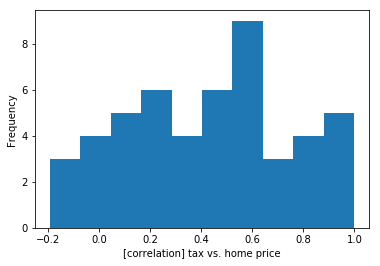

In [5]:
res['correl'].plot.hist()
plt.xlabel('[correlation] tax vs. home price')

Text(0.5,0,'[coeff. of det. in LinReg] tax vs. home price')

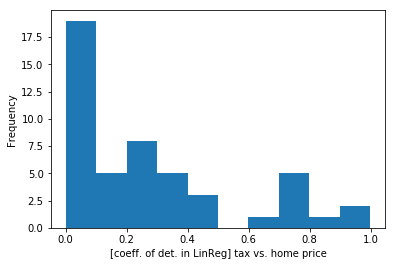

In [6]:
res['cod'].plot.hist()
plt.xlabel('[coeff. of det. in LinReg] tax vs. home price')